# Настройка окружения

In [ ]:
!pip install pymatgen matminer

# Создание признаков

In [ ]:
import pandas as pd
import numpy as np
from pymatgen.core import Structure
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.structure import (
    SiteStatsFingerprint, StructuralHeterogeneity,
    ChemicalOrdering, StructureComposition, DensityFeatures
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import json

In [ ]:
%%time
data = pd.read_csv("full_mp+jv_5k_stable_bg_dataset_50.csv")

def json_to_structure(json_str):
    d = json.loads(json_str)
    return Structure.from_dict(d)

data["structure"] = data["structure_json"].apply(json_to_structure)

targets = ["k_1064", "k_755", "k_1500"]
y = data[targets]

# Извлечения признаков из структуры
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    StructureComposition(ElementProperty.from_preset("magpie")),
    DensityFeatures()
])

X_features = featurizer.featurize_many(data["structure"], pbar=False)
X_features = pd.DataFrame(X_features, columns=featurizer.feature_labels())

additional_features = data[["bandgap", "energy_above_hull", "spacegroup"]]
X = pd.concat([X_features, additional_features], axis=1)

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

/usr/local/lib/python3.11/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


CPU times: user 259 ms, sys: 144 ms, total: 403 ms
Wall time: 14.1 s


In [ ]:
%%time
data = pd.read_csv("full_mp+jv_5k_stable_bg_dataset_500.csv")

def json_to_structure(json_str):
    d = json.loads(json_str)
    return Structure.from_dict(d)

data["structure"] = data["structure_json"].apply(json_to_structure)

targets = ["k_1064", "k_755", "k_1500"]
y = data[targets]

# Извлечения признаков из структуры
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    StructureComposition(ElementProperty.from_preset("magpie")),
    DensityFeatures()
])

X_features = featurizer.featurize_many(data["structure"], pbar=False, ignore_errors=True )
X_features = pd.DataFrame(X_features, columns=featurizer.feature_labels())

additional_features = data[["bandgap", "energy_above_hull", "spacegroup"]]
X = pd.concat([X_features, additional_features], axis=1)

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

/usr/local/lib/python3.11/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


CPU times: user 1.68 s, sys: 1.44 s, total: 3.12 s
Wall time: 1min 35s


In [ ]:
%%time
data = pd.read_csv("full_mp+jv_5k_stable_bg_dataset_new.csv")

def json_to_structure(json_str):
    d = json.loads(json_str)
    return Structure.from_dict(d)

data["structure"] = data["structure_json"].apply(json_to_structure)

targets = ["k_1064", "k_755", "k_1500"]
y = data[targets]

# Извлечения признаков из структуры
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    StructureComposition(ElementProperty.from_preset("magpie")),
    DensityFeatures()
])

X_features = featurizer.featurize_many(data["structure"], pbar=False, ignore_errors=True )
X_features = pd.DataFrame(X_features, columns=featurizer.feature_labels())

additional_features = data[["bandgap", "energy_above_hull", "spacegroup"]]
X = pd.concat([X_features, additional_features], axis=1)

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

/usr/local/lib/python3.11/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


CPU times: user 22.9 s, sys: 19.7 s, total: 42.7 s
Wall time: 50min 4s


In [ ]:
X.to_csv(f'features.csv', index=False)
y.to_csv(f'targets.csv', index=False)

In [ ]:
X = pd.read_csv('features.csv')
y = pd.read_csv('targets.csv')

# Pipeline модели и обучение

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

CPU times: user 6.2 ms, sys: 2.94 ms, total: 9.14 ms
Wall time: 15.8 ms


In [ ]:
%%time
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Анализ

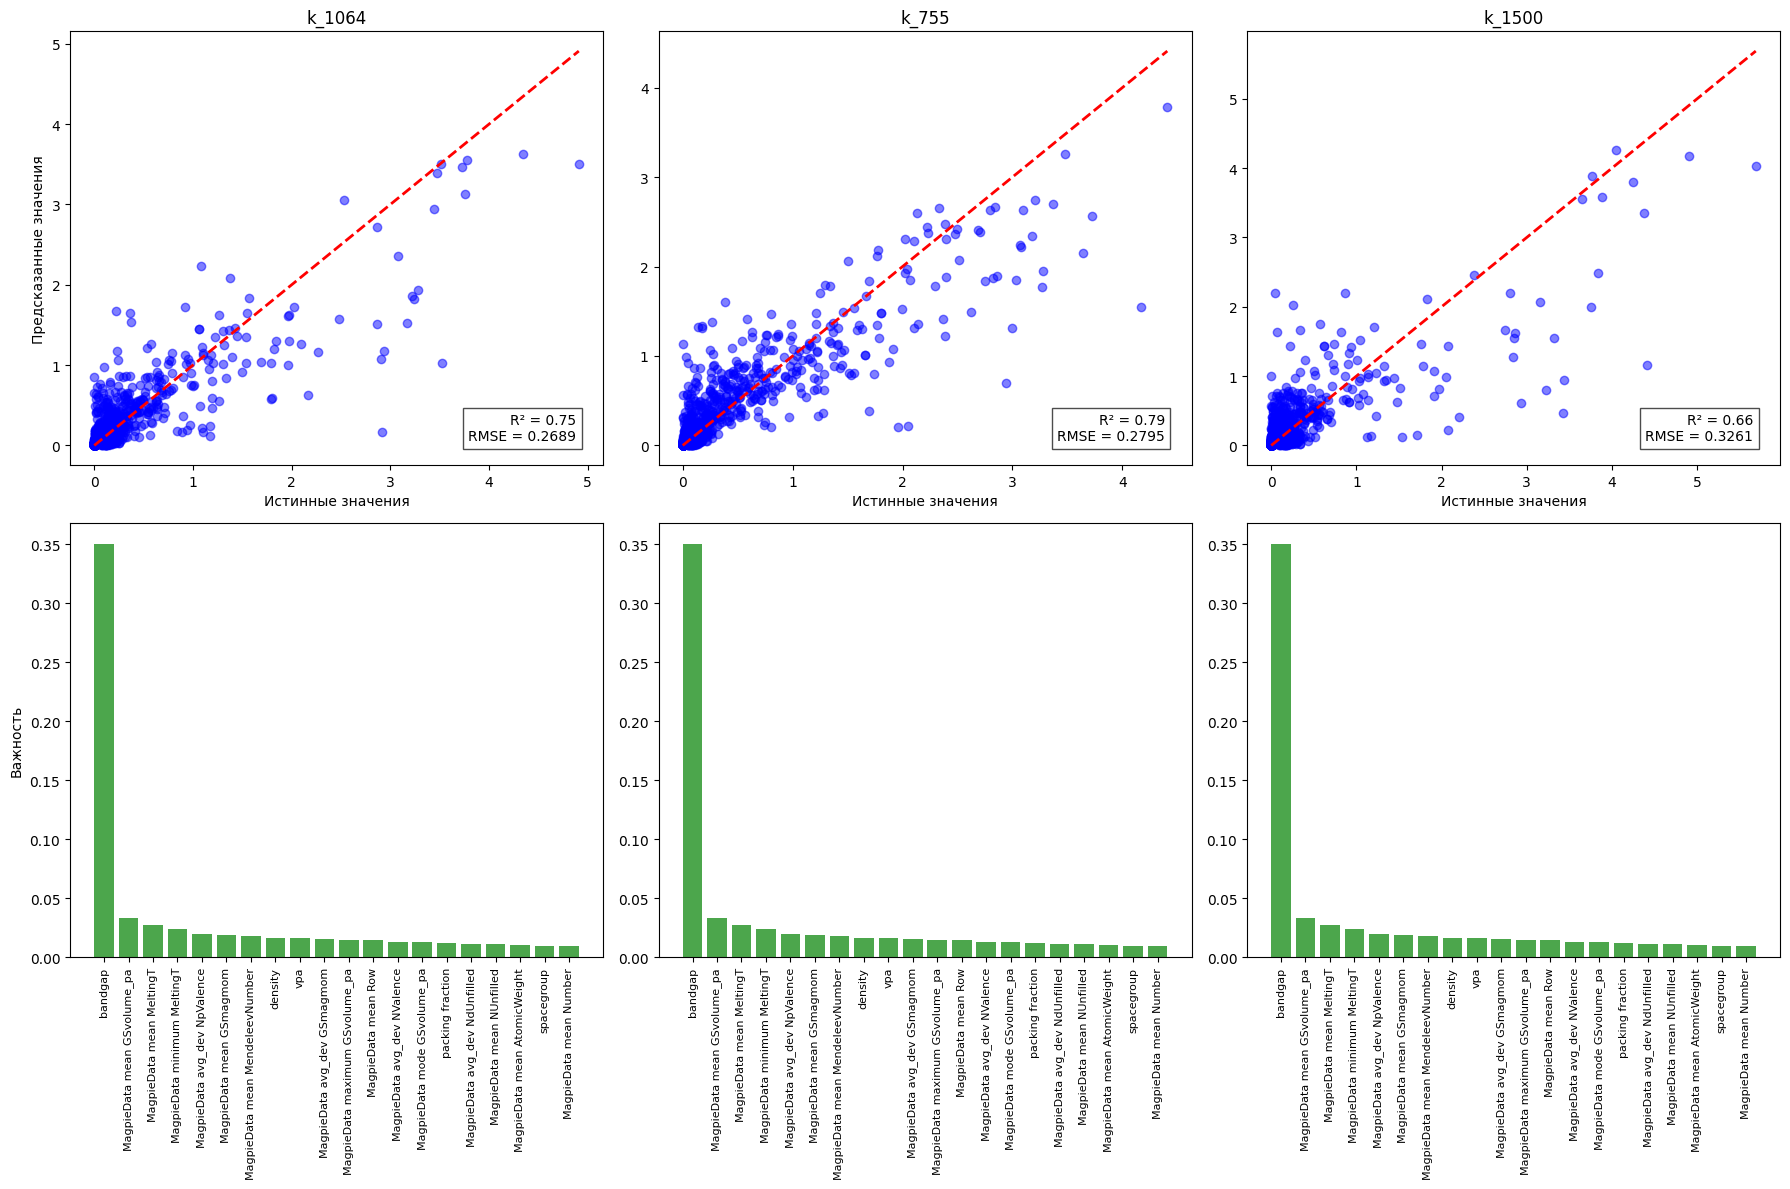

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Верхний ряд: графики predicted vs target
for i, target in enumerate(targets):
    ax = axes[0, i]
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]

    min_val = min(y_true.min(), y_pred_target.min())
    max_val = max(y_true.max(), y_pred_target.max())

    ax.scatter(y_true, y_pred_target, alpha=0.5, color='blue')
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)  # Линия y=x

    ax.set_xlabel(f'Истинные значения', fontsize=10)
    if i == 0: ax.set_ylabel(f'Предсказанные значения', fontsize=10)
    ax.set_title(f'{target}', fontsize=12)

    r2 = r2_score(y_true, y_pred_target)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_target))
    ax.text(0.95, 0.05, f'R² = {r2:.2f}\nRMSE = {rmse:.4f}',
            transform=ax.transAxes, fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

# Нижний ряд: важность признаков
for i, target in enumerate(targets):
    ax = axes[1, i]

    model = pipeline.named_steps['model']

    importances = model.feature_importances_[:, i] if len(model.feature_importances_.shape) > 1 else model.feature_importances_
    indices = np.argsort(importances)[::-1]

    top_n = 20
    indices = indices[:top_n]

    ax.bar(range(top_n), importances[indices], align='center', color='green', alpha=0.7)
    ax.set_xticks(range(top_n))
    ax.set_xticklabels([X.columns[j] for j in indices], rotation=90, fontsize=8)
    if i == 0: ax.set_ylabel('Важность', fontsize=10)

plt.tight_layout()
plt.savefig('result.png', dpi=600, bbox_inches='tight')
plt.show()

# GridSearch

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Верхний ряд: графики predicted vs target
for i, target in enumerate(targets):
    ax = axes[0, i]
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]

    min_val = min(y_true.min(), y_pred_target.min())
    max_val = max(y_true.max(), y_pred_target.max())

    ax.scatter(y_true, y_pred_target, alpha=0.5, color='blue', label='test')
    ax.scatter(y_train[target], y_pred_train[:, i], alpha=0.3, color='red', label='train')
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    ax.set_xlabel(f'Истинные значения', fontsize=10)
    if i == 0: ax.set_ylabel(f'Предсказанные значения', fontsize=10)
    ax.set_title(f'{target}', fontsize=12)

    r2 = r2_score(y_true, y_pred_target)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_target))
    ax.text(0.95, 0.05, f'R² = {r2:.2f}\nRMSE = {rmse:.4f}',
            transform=ax.transAxes, fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

# Нижний ряд: важность признаков
for i, target in enumerate(targets):
    ax = axes[1, i]

    model = pipeline.named_steps['model']

    importances = model.feature_importances_[:, i] if len(model.feature_importances_.shape) > 1 else model.feature_importances_
    indices = np.argsort(importances)[::-1]

    top_n = 20
    indices = indices[:top_n]

    ax.bar(range(top_n), importances[indices], align='center', color='green', alpha=0.7)
    ax.set_xticks(range(top_n))
    ax.set_xticklabels([X.columns[j] for j in indices], rotation=90, fontsize=8)
    if i == 0: ax.set_ylabel('Важность', fontsize=10)

plt.tight_layout()
plt.savefig('result.png', dpi=600, bbox_inches='tight')
plt.show()

## Корреляционный анализ

(5961, 155)


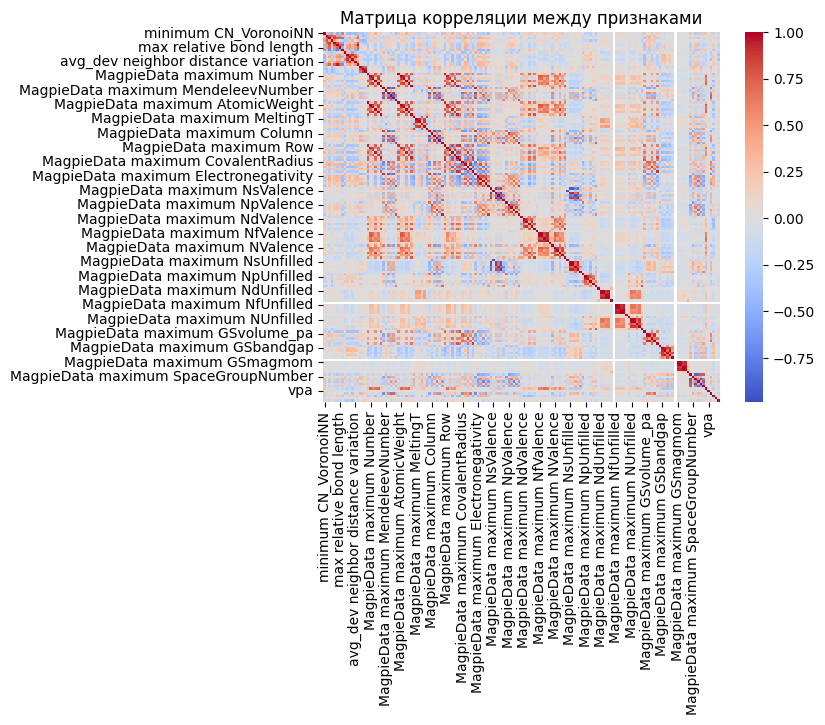

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

print(X.shape)

corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Матрица корреляции между признаками')
plt.show()

In [54]:
def remove_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop)

X_filtered = remove_correlated_features(X, threshold=0.85)
print(f"Удалено {X.shape[1] - X_filtered.shape[1]} признаков")

Удалено 69 признаков


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y,
    test_size=0.2,
    random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)
X.shape, y.shape

((5961, 155), (5961, 3))

(1193, 3) (4768, 3)


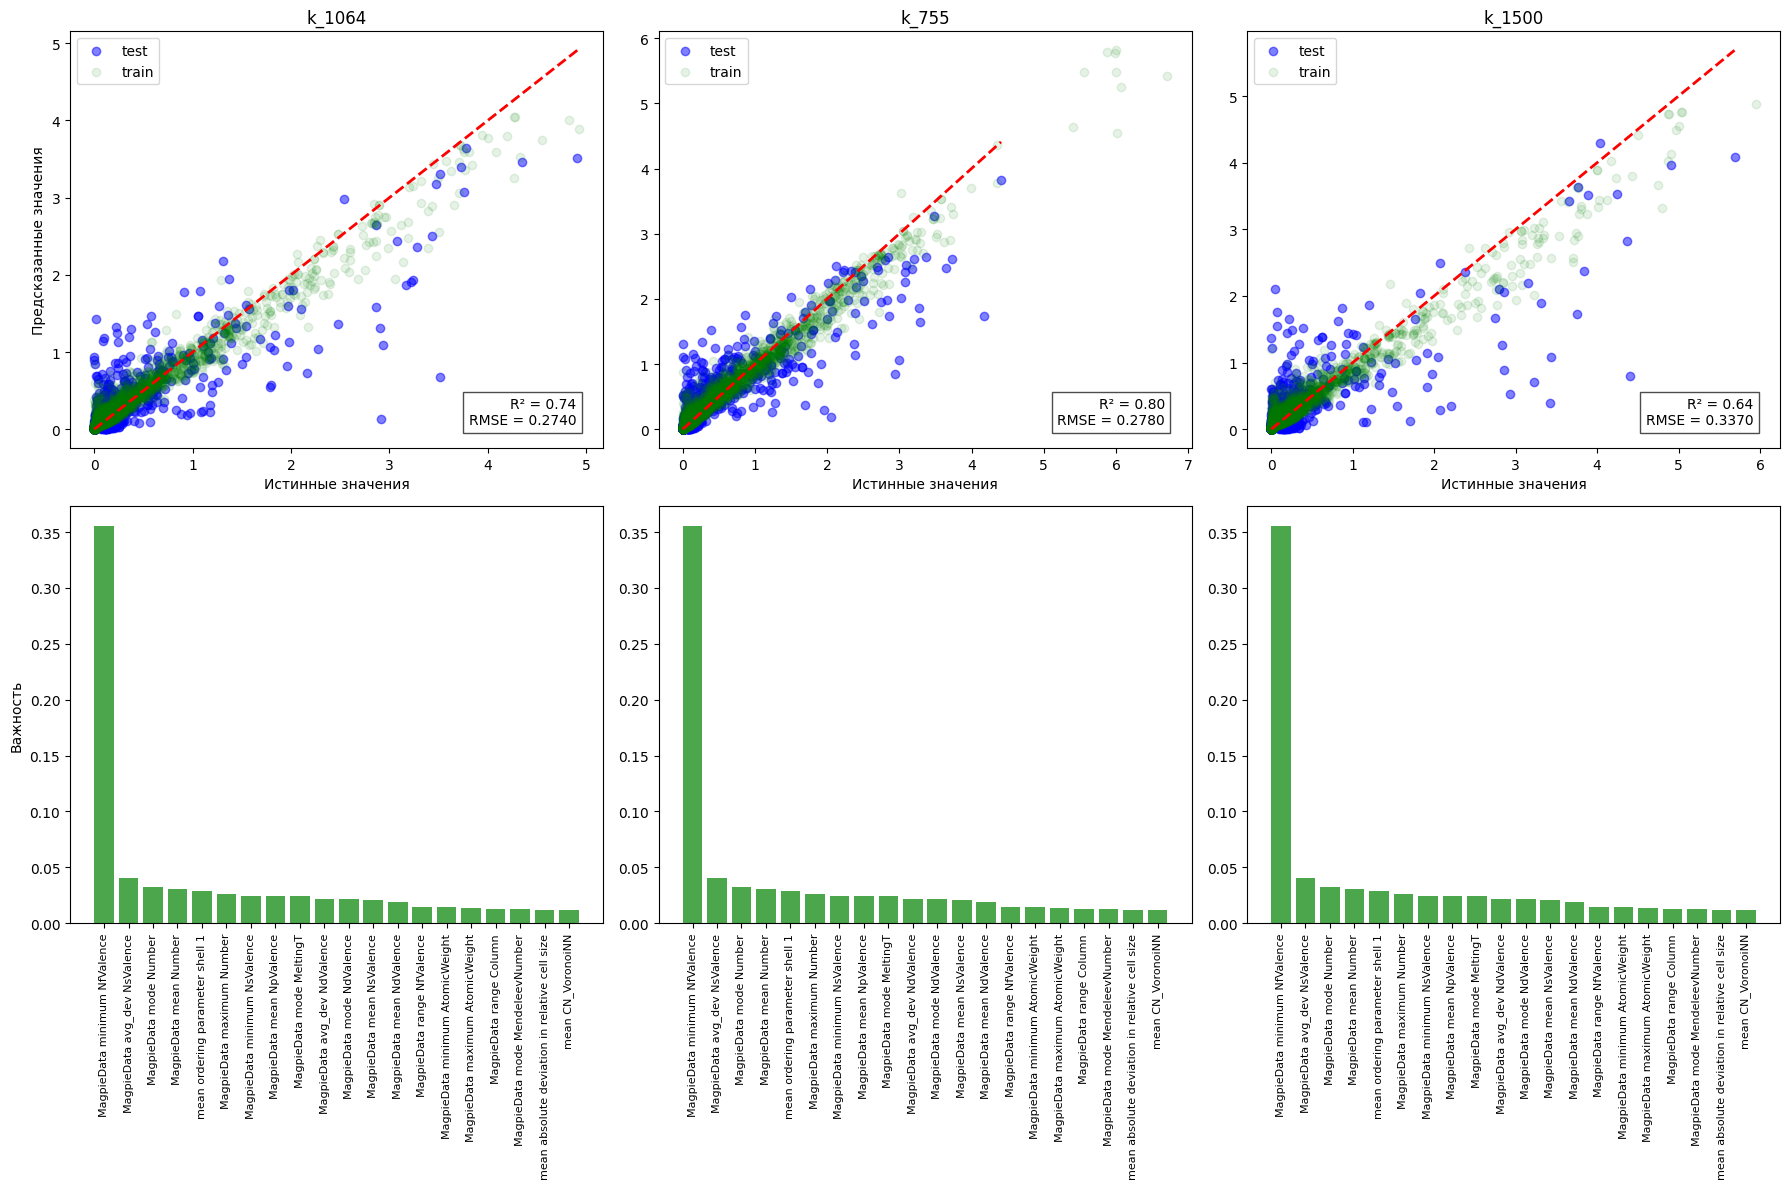

In [56]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print(y_pred.shape, y_pred_train.shape)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Верхний ряд: графики predicted vs target
for i, target in enumerate(targets):
    ax = axes[0, i]
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]

    min_val = min(y_true.min(), y_pred_target.min())
    max_val = max(y_true.max(), y_pred_target.max())

    ax.scatter(y_true, y_pred_target, alpha=0.5, color='blue', label='test')
    ax.scatter(y_train[target], y_pred_train[:, i], alpha=0.1, color='green', label='train')
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    ax.set_xlabel(f'Истинные значения', fontsize=10)
    if i == 0: ax.set_ylabel(f'Предсказанные значения', fontsize=10)
    ax.set_title(f'{target}', fontsize=12)

    ax.legend()

    r2 = r2_score(y_true, y_pred_target)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_target))
    ax.text(0.95, 0.05, f'R² = {r2:.2f}\nRMSE = {rmse:.4f}',
            transform=ax.transAxes, fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

# Нижний ряд: важность признаков
for i, target in enumerate(targets):
    ax = axes[1, i]

    model = pipeline.named_steps['model']

    importances = model.feature_importances_[:, i] if len(model.feature_importances_.shape) > 1 else model.feature_importances_
    indices = np.argsort(importances)[::-1]

    top_n = 20
    indices = indices[:top_n]

    ax.bar(range(top_n), importances[indices], align='center', color='green', alpha=0.7)
    ax.set_xticks(range(top_n))
    ax.set_xticklabels([X.columns[j] for j in indices], rotation=90, fontsize=8)
    if i == 0: ax.set_ylabel('Важность', fontsize=10)

plt.tight_layout()
plt.savefig('result.png', dpi=600, bbox_inches='tight')
plt.show()

# Нелинейный анализ

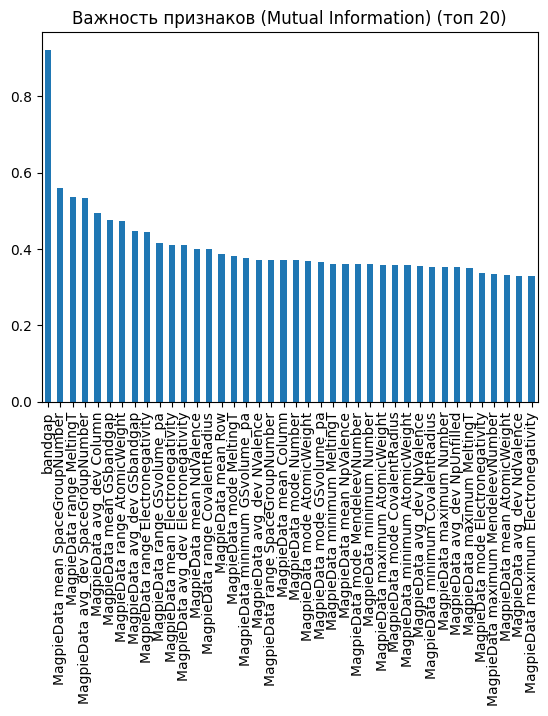

In [50]:
mi_scores = mutual_info_regression(X, y.iloc[:, 0])
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)[:40]

mi_scores.plot(kind='bar', title='Важность признаков (Mutual Information) (топ 20)')
plt.xticks(rotation=90)
plt.show()

In [51]:
X_top20 = X[mi_scores.index]

X_train, X_test, y_train, y_test = train_test_split(
    X_top20,
    y,
    test_size=0.2,
    random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)
X.shape, y.shape

((5961, 155), (5961, 3))

(1193, 3) (4768, 3)


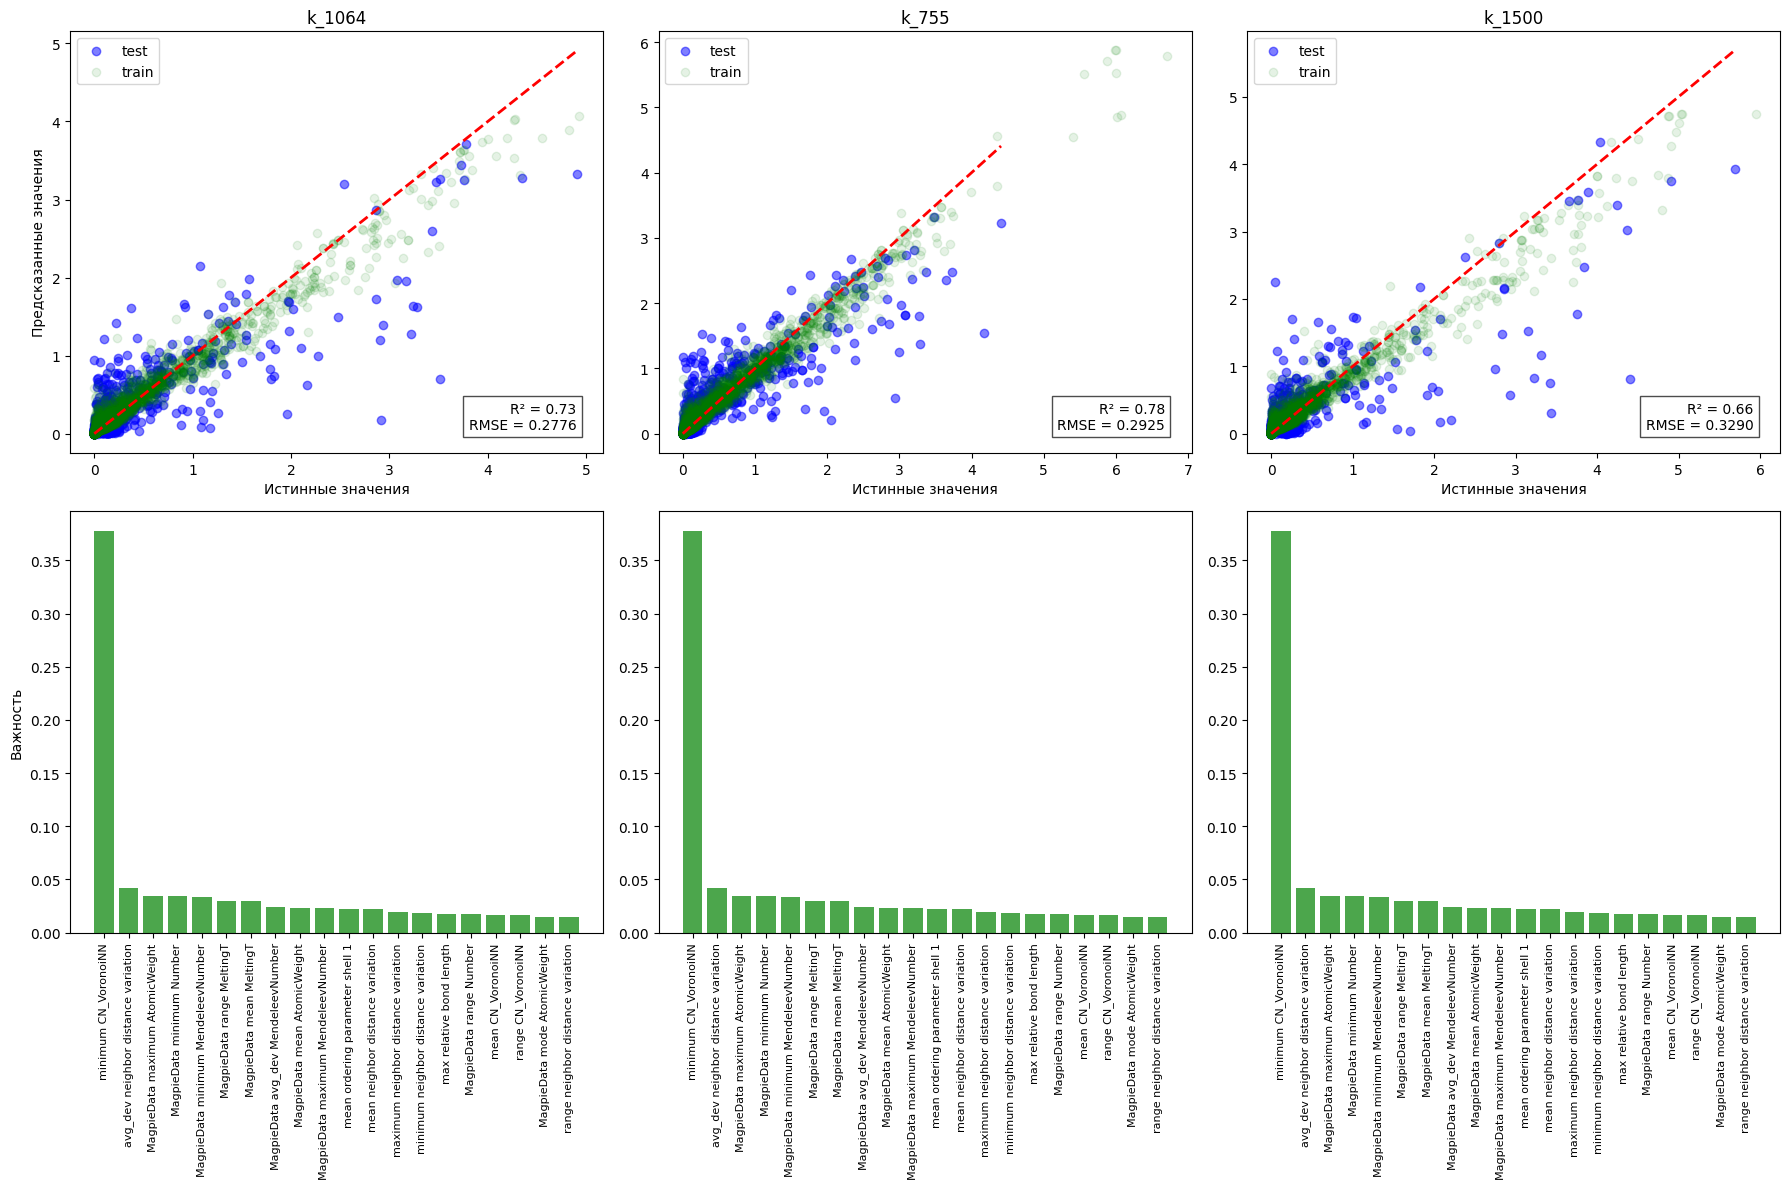

In [52]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
print(y_pred.shape, y_pred_train.shape)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Верхний ряд: графики predicted vs target
for i, target in enumerate(targets):
    ax = axes[0, i]
    y_true = y_test[target]
    y_pred_target = y_pred[:, i]

    min_val = min(y_true.min(), y_pred_target.min())
    max_val = max(y_true.max(), y_pred_target.max())

    ax.scatter(y_true, y_pred_target, alpha=0.5, color='blue', label='test')
    ax.scatter(y_train[target], y_pred_train[:, i], alpha=0.1, color='green', label='train')
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    ax.set_xlabel(f'Истинные значения', fontsize=10)
    if i == 0: ax.set_ylabel(f'Предсказанные значения', fontsize=10)
    ax.set_title(f'{target}', fontsize=12)

    ax.legend()

    r2 = r2_score(y_true, y_pred_target)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_target))
    ax.text(0.95, 0.05, f'R² = {r2:.2f}\nRMSE = {rmse:.4f}',
            transform=ax.transAxes, fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

# Нижний ряд: важность признаков
for i, target in enumerate(targets):
    ax = axes[1, i]

    model = pipeline.named_steps['model']

    importances = model.feature_importances_[:, i] if len(model.feature_importances_.shape) > 1 else model.feature_importances_
    indices = np.argsort(importances)[::-1]

    top_n = 20
    indices = indices[:top_n]

    ax.bar(range(top_n), importances[indices], align='center', color='green', alpha=0.7)
    ax.set_xticks(range(top_n))
    ax.set_xticklabels([X.columns[j] for j in indices], rotation=90, fontsize=8)
    if i == 0: ax.set_ylabel('Важность', fontsize=10)

plt.tight_layout()
plt.savefig('result.png', dpi=600, bbox_inches='tight')
plt.show()